#  TUGAS BESAR PENGOLAHAN CITRA DIGITAL:
# Image Processing Citra Bidak Catur dengan Menggunakan Metode Image Resizing, Image Conversion, Image Enhancement, Histogram, Ekualisasi Histogram, Image Smoothing (Median Filtering),  dan Ekstraksi Ciri

### Oleh Kelompok 7
#### Anggota:
1. Bilya Putra Aji           (F1D019015)
2. Diah Sunasti Hadiningrum  (F1D019020)
3. Muhammad Ari Rifqi        (F1D019068)
4. Muqfiratun Ihram          (F1D019076)

In [1]:
#melakukan import library yang diperlukan untuk membaca gambar,mengkonversi gambar, me-resize gambar
#dan melakukan penghitungan matriks, dan histogram
import cv2

#mengimport library numpy (numerical python) untuk membuat array
#Penggunaan as disini, artinya kita menggantikan pemanggilan numpy dengan prefix np untuk proses berikutnya.
import numpy as np

#melakukan import terlebih dahulu library matplotlib.pyplot as plt 
#untuk membuat beberapa perubahan pada citra misalnya, membaca citra, membuat area plot dalam citra, dan menampilkan citra
#Penggunaan as disini, artinya kita menggantikan pemanggilan fungsi pyplot pada matplotlib 
#dengan prefix plt untuk proses berikutnya
import matplotlib.pyplot as plt

#Pandas adalah sebuah paket library pada python yang digunakan untuk mempermudah dalam mengolah dan 
#menganalisa data-data terstruktur. 
import pandas as pd

#melakukan import math untuk melakukan operasi-operasi matematika
import math

#melakukan import greycomatrix, greycoprops dari library skimage.feature untuk membentuk matriks GLCM
from skimage.feature import greycomatrix, greycoprops

#Melakukan import PIL untuk membuka path gambar
from PIL import Image

#melakukan import csv untuk membaca dan membentuk file csv berdasarkan citra
import csv

# Metode Image Resizing

### Alasan Penggunaan metode : 
Untuk memperkecil ukuran citra dataset agar preprocessing dan ekstraksi fitur dapat lebih cepat dilakukan dan juga untuk menentukan ukuran terbaik.

In [2]:
#membuat fungsi untuk me-resize citra 
#terdapat 2 parameter,yaitu citra sbg representasi citra dataset, dan ukuran, sebagai ukuran citra yang baru hasil resizing
def resize(citra, ukuran): 
    #membuat variabel img_resize yang menampung proses resize citra menggunakan cv2.resize
    img_resize = cv2.resize(citra,(ukuran,ukuran))
    return img_resize  #me-return variabel hasil resize citra

# Metode Image Conversion (RGB to Gray)

### Alasan penggunaan metode ini: 
Untuk bisa melakukan dan memudahkan pengolahan citra, misalnya seperti image enhancement, ekualisasi histogram, dan image smoothing, maka digunakanlah metode RGB to Gray untuk mengubah citra berwarna menjadi citra grayscale

In [3]:
#membuat fungsi untuk mengkonversi citra menjadi grayscale
#terdapat 1 parameter yaitu rgb sebagai representasi citra berwarna
def rgb2gray(rgb):
    #membuat variabel gray yang akan menampung citra hasil konversi dari rgb ke grayscale 
    #dengan menggunakan cv2.cvtColor dan juga cv2.COLOR_BGR2GRAY
    gray=cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
    return gray  #me-return variabel hasil konversi citra grayscale

# Membuat class Data dengan fungsi untuk membaca data citra pada dataset kemudian membacanya sebagai file csv

In [4]:
#membuat class Data dengan fungsi untuk membaca data citra pada dataset kemudian membacanya sebagai file csv
class Data:
    def __init__(self,path): #konstruktor
        #membuka path folder letak citra dataset kemudian mengubahnya menjadi array dan disimpan di variabel img
        img=np.array(Image.open(path))
        self.citra = img  #kemudian img disimpan pada variabel citra
    
    #fungsi untuk mengubah data ke dalam csv
    def insertoCsv(self,data):
        row = data; #menyimpan parameter data ke variabel row
        with open('chess_fitur.csv','a') as csvFile:  #membuka file dengan nama chess_fitur.csv sebagai file csv
            #mengisi file csv berdasarkan proses ekstraksi ciri dengan fitur glcm yang akan digunakan nantinya
            writer = csv.writer(csvFile) # menulis file csv menggunakan csv.writer
            writer.writerow(row) #mengisi file csv yang sudah ada dengan hasil ekstraksi ciri nantinya
        csvFile.close() #menutup file csv

# Metode Histogram

### Alasan penggunaan metode ini:
Penggunaan metode histogram kami tujukan untuk melihat penyebaran nilai-nilai intensitas pixel dari suatu citra atau bagian tertentu di dalam citra, dan juga memperlihatkan histogram dari hasil image enhancement

In [5]:
def histogram(A, no_levels):  #A = representasi citra, no_levels = banyak intensitas keabuan (256 dari [0-255])
   # mendapatkan ukuran matriks citra input
    N, M = A.shape
    # membuat histogram kosong dengan ukuran proporsional dengan jumlah tingkat grayscale
    hist = np.zeros(no_levels).astype(int)

    # menghitung untuk semua level dalam range
    #menghitung persebaran nilai intensitas derajat keabuan dari citra
    for i in range(no_levels):
       # jumlahkan semua posisi di mana jika A == i benar
        pixels_value_i = np.sum(A == i)
        # simpan di array histogram
        hist[i] = pixels_value_i
            
    return(hist) #me-return histogram citra

# Metode Ekualisasi Histogram

### Alasan penggunaan metode ini:
Untuk melakukan transformasi terhadap histogram citra asli sedemikian sehingga didapat histogram citra hasil dengan distribusi lebih seragam atau linearisasi

Salah satu Teknik yang digunakan secara luas untuk meningkatkan kualitas citra atau ingin mengatur tampilan citra adalah peningkatan berbasis histogram, yang menggunakan citra *histogram* sebagai sumber informasi tentang distribusi intensitas dari citra.

Histogram dihitung dengan menghitung berapa kali setiap tingkat intensitas muncul dalam citra.



Cara yang cukup sederhana untuk menghitung histogram (walaupun ada cara yang lebih optimal untuk melakukannya), adalah dengan mengulangi semua nilai tingkat intensitas/abu-abu, dan memeriksa berapa banyak piksel dalam matriks yang dimiliki setiap nilai.

Metode utamanya dikenal sebagai **Histogram Equalisation**.

Ini menggunakan histogram kumulatif sebagai fungsi untuk mengubah nilai piksel dan meningkatkan kualitas citra. Teknik dasar untuk ekualisasi dirancang sedemikian rupa sehingga dapat mendistribusikan piksel-piksel seseragam mungkin sepanjang semua rentang nilai keabuan yang mungkin.

Setelah menghitung histogram kumulatif, untuk menjadikannya fungsi transformasi yang tepat, dilakukan penskalaan (seperti yang dilakukan dengan transformasi log, misalnya) untuk memungkinkan keluaran dalam interval 0-255.

Transformasi, untuk setiap piksel *r* diberikan oleh: $$s = T(r) = \frac{L-1}{MN} hc(r)$$ di mana *hc* adalah histogram kumulatif dan *hc( r)* adalah nilai histogram kumulatif yang dievaluasi pada tingkat intensitas *r*

In [6]:
#fungsi ekulaisasi histogram
def histogram_equalization(A, no_levels):
   # menghitung histogram citra
    hist = histogram(A,  no_levels)
    
    # membuat histogram kumulatif yang kosong
    histC = np.zeros(no_levels).astype(int)

    # menghitung histogram kumulatif
    histC[0] = hist[0] # nilai pertama (intensitas ke-0)
    # dari intensitas ke-1 hingga no_levels
    for i in range(1,  no_levels):
        histC[i] = hist[i] + histC[i-1]

    # vektor di bawah ini digunakan untuk menyimpan fungsi transformasi yang sebenarnya
    # memungkinkan kita untuk kemudian memvisualisasikan apa fungsi equalisasi yang dihitung
    hist_transform = np.zeros(no_levels).astype(np.uint8)
    
    # mendapatkan ukuran citra masukan
    N, M = A.shape
    
    # membuat citra untuk menyimpan versi yang diekualisasikan
    A_eq = np.zeros([N,M]).astype(np.uint8)
    
    # untuk setiap nilai intensitas, ubah menjadi intensitas baru
    # menggunakan fungsi np.where()
    for z in range(no_levels): 
        # menghitung ekualisasi histogram dengan persamaan ekualisasi histogram
        s = ((no_levels-1)/float(M*N))*histC[z]
        
        # untuk setiap koordinat di mana matriks A memiliki nilai 'z'
        # menetapkan nilai yang diubah/diekulasisasi  dengan niai 's' hasil perhitungan ekualisasi
        A_eq[ np.where(A == z) ] = s #representasi citra hasil ekualisasi
        
        # simpan fungsi transformasi
        hist_transform[z] = s #representasi histogram hasil ekualisasi
    #return citra hasil transformasi dan juga histogramnya
    return (A_eq, hist_transform)

# Image Smoothing (Median Filtering)

### Alasan penggunaan metode ini:
Untuk melakukan pemfilteran dengan menggunakan penghitungan nilai median dari citra (nilai tengah piksel pada citra) untuk perbaikan kualitas citra, dan menekan gangguan (noise) pada citra.

Median adalah pengambilan nilai tengah piksel citra. Median
dapat ditemukan pada data yang telah diurutkan . Untuk
menentukan median filter ini, pertama-tama ditentukan piksel utama yang akan diproses dari
piksel-piksel disekitarnya. Pada median filtering digunakan matrik berdimensi N X N. Dari matrik
tersebut, kemudian data yang ada diurutkan dan dimasukkan dalam sebuah matrik berukuran
1X(N X N). Hal ini berguna untuk mempermudah menemukan mediannya untuk pencarian nilai
yang tengah dari kumpulan data yang telah urut tersebut

In [7]:
#fungsi median filtering (data harus terurut)
#Untuk median filtering ini, data yang digunakan untuk menghitung median terdiri dari
#kumpulan data yang ganjil. Hal ini disebabkan dengan jumlah data yang ganjil maka piksel yang
#akan diproses dapat berada ditengah. Pada median filtering digunakan matrik berdimensi N XN. 
#Dari matrik citra, kemudian data yang ada diurutkan dan dimasukkan dalam sebuah
#matrik berukuran 1X (N X N). Hal ini berguna untuk mempermudah menemukan median dari kumpulan data yang telah urut
def medianFilter(citra,jmlpad):
    #mendeklarasikan variabel result yang akan menampung hasil image smoothing menggunakan median filtering
    result = np.zeros(citra.shape)
    
    #mendeklarasikan variabel pad sebagai representasi penambahan padding pada matriks citra
    pad = np.pad(citra,(jmlpad,jmlpad),mode='edge')
    
    #perulangan sebanyak jumlah padding yang diberikan 
    #(sesuai dengan ukuran window) 
    #sampai dengan len(pad)-jmlpad
    for i in range(jmlpad,len(pad)-jmlpad):
        
        #perulangan bersarang sebanyak jumlah padding yang diberikan 
        #(sesuai dengan ukuran window) 
        #sampai dengan len(pad)-jmlpad
        for j in range(jmlpad,len(pad)-jmlpad): 
            
            #melakukan penghitungan dan pengolahan nilai matriks array dengan menambahkan padding pada matriks
            #agar penghitungan median filtering dapat sesuai
            #digunakan juga np.ravel untuk mengolah nilai array pada matriks citra menjadi bentuk 1x(NXN) matriks. 
            #penggunaan ravel akan lebih cepat karena tidak ada memori yang disalin
            temp = np.ravel(pad[i-jmlpad:i+jmlpad+1,j-jmlpad:j+jmlpad+1])
            #melakukan pengurutan terhadap data matriks citra untuk dapat dicari median-nya
            temp.sort()
            #mencari nilai median, dengan membagi 2 panjang data
            result[i-jmlpad,j-jmlpad] = temp[int(len(temp)/2)]
    #mengembalikan result, sebagai representasi hasil image smoothing menggunakan median filtering
    return result

# Metode Image Enhancement : Colour Processing

### Alasan penggunaan metode ini: 
Melakukan image enhacement dengan melakukan pengolahan citra berdasarkan ruang warna pada citra dataset, dan untuk memperlihatkan kualitas citra pada alternatif warna yang berbeda-beda (pengubahan kontras), serta untuk meningkatkan mutu suatu citra melalui perbaikan kontras dan kecerahan. Kemudian kami menggunakan koreksi gamma agar proses pengubahan kontras mudah dilakukan yaitu cukup dengan hanya mengganti/mengubah faktor koreksi gamma, tanpa perlu mempengaruhi mutu citra ynag sudah didapatkan


### Memproses warna citra dengan menggunakan koreksi gamma


Untuk memproses gambar berwarna, misalnya menyempurnakannya, kami dapat mengulangi proses tersebut di semua channel satu per satu.
Namun, ini mungkin memiliki efek yang tidak diinginkan, membuat warna menjadi tidak seimbang.

Di sini kami mencoba menggunakan metode koreksi gamma dengan tujuan membuat citra semakin terang, dengan cara mengecilkan faktor koreksi gamma, kemudian membandingkan citra yang lebih gelap dengan membesarkan faktor koreksi gamma

#### Koreksi Gamma :
faktor keteduhan yang mempengaruhi pemetaan antara nilai intensitas (tingkat keabuan) citra masukan dan keluaran
sehingga pemetaan bisa tak-linear. Sebagai contoh nilai
dari intensitas masukan minimum sampai intensitas
masukan maksimum dapat dipetakan ke dalam nilai dari
intensitas keluaran minimum sampai intensitas keluaran
maksimum.

Gamma memiliki nilai lebih besar dari 0. Jika
gamma sama dengan satu, maka pemetaanya linear. Jika
gamma kurang dari 1, pemetaannya cenderung menuju
nilai keluaran yang lebih tinggi (terang). Jika gamma
lebih besar dari pada 1, pemetaannya cenderung menuju
nilai keluaran yang lebih rendah (lebih gelap). Gambar 1
menunjukkan pemetaan intensitas dengan gamma yang
berbeda.

In [8]:
#fungsi koreksi gamma
def koreksi_gamma(img, gamma):
    #variabel R representasi dari nilai piksel tertinggi, yaitu 255
    R = 255.0
    #mengembalikan hasil koreksi gamma berdasarkan rumus koreksi gamma
    #jika faktor koreksi gamma semakin besar maka citra akan lebih gelap, tapi jika semakin kecil
    #maka citra akan lebih terang (if faktor_koreksi_gamma < 1 Then citra lebih terang)
    return (R * np.power(img.astype(np.uint32) / R, gamma)).astype(np.uint8) 

## Menampilkan Original Image

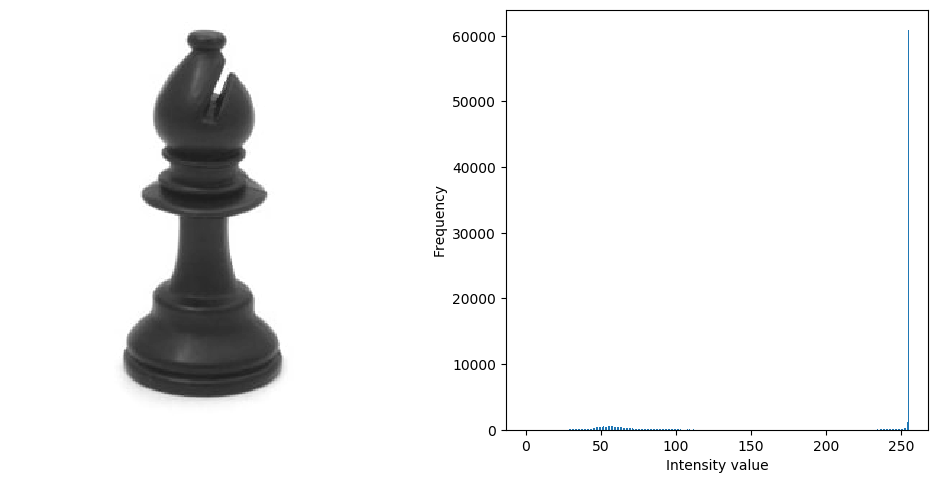

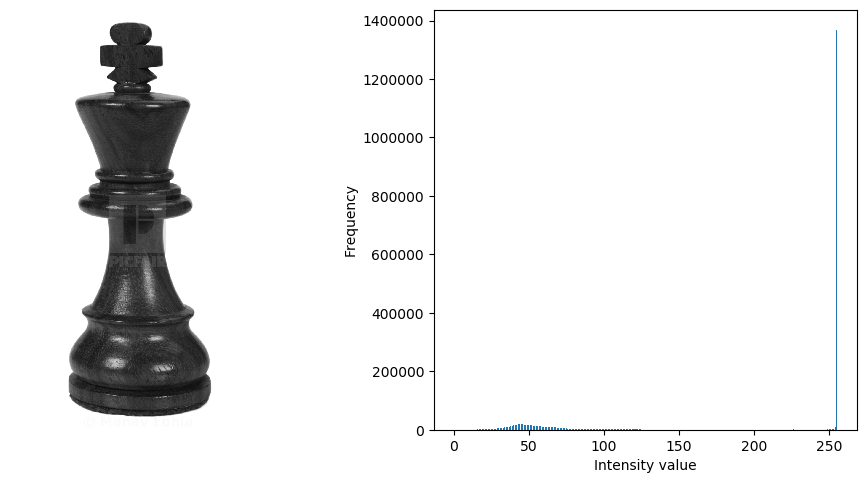

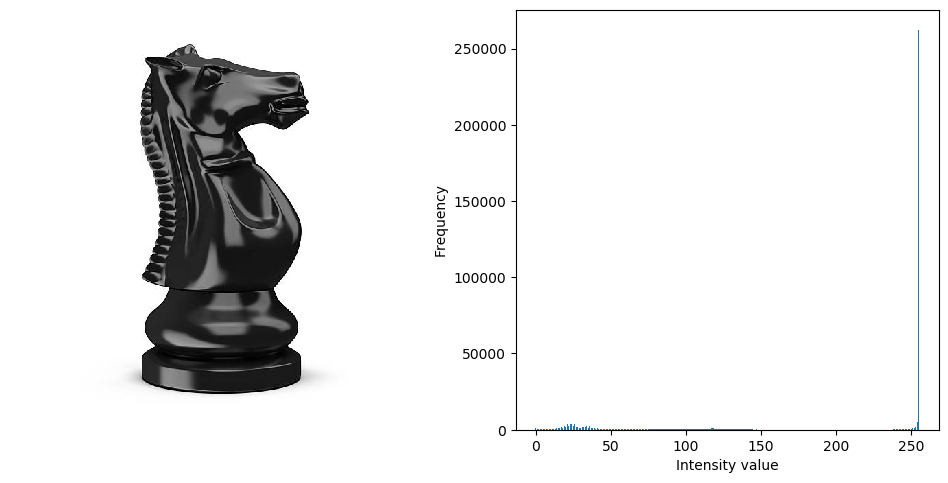

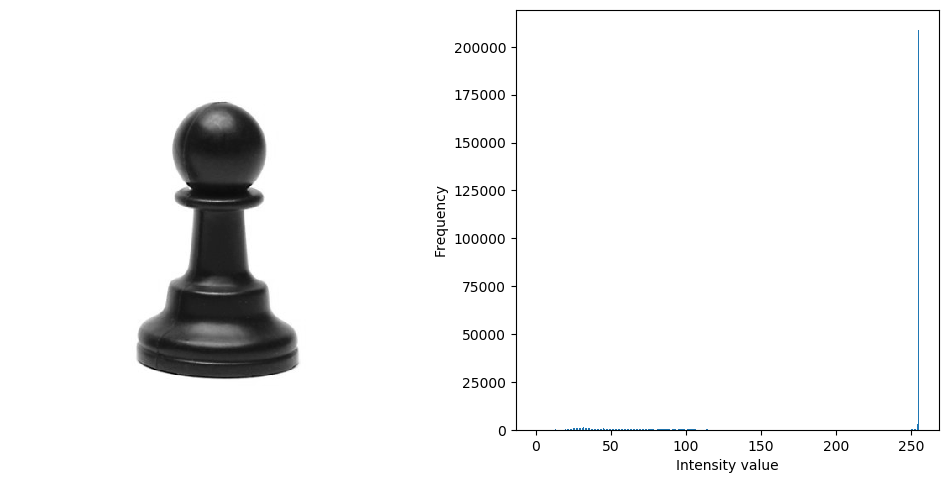

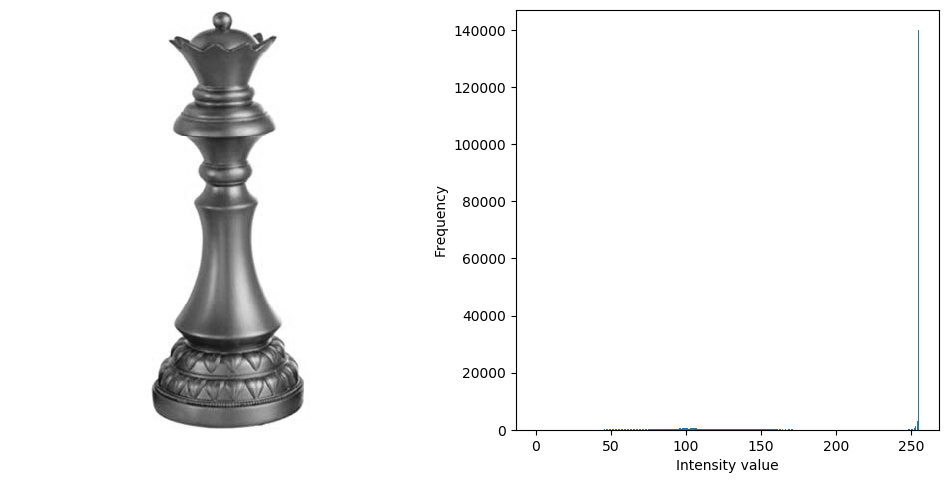

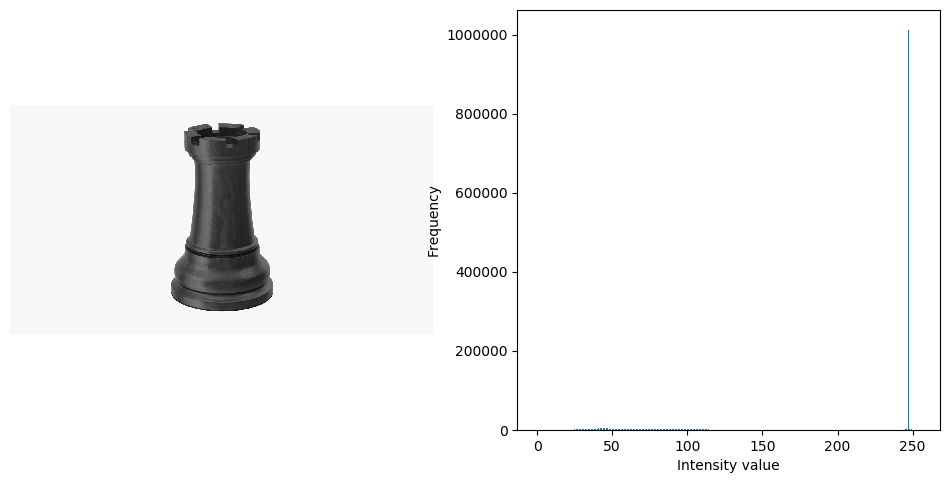

In [11]:
#melakukan import glob untuk membaca dataset
import glob

#kelas (path) pada folder dataset
class_chess = ['Bishop','King','Knight','Pawn','Queen','Rook']
for path in class_chess:
    #perulangan untuk setiap file citra, pada metode ini akan digunakan beberapa buah citra dari dataset
    for filename in glob.glob('Chess/'+path+'/00000017.jpg'):
   
        #membuat variabel data yang akan menyimpan hasil pembacaan citra oleh Kelas Data 
        #yang mana kelas Data tersebut akan membuka file citra tersebut
        data = Data(filename)
        data.citra = rgb2gray(data.citra)
        # menghitung histogram citra dengan 256 derajat keabuan
        hist_img = histogram(data.citra, 256)

        # menampilkan citra dan histogram yang telah dibentuk
        # vmin dan vmax digunakan sebagai parameter untuk menampilkan citra
        # citra yang akan ditampilkan akan memperlihatkan frekuensi intensitas piksel untuk semua derajat keabuan yaitu 256
        plt.figure(figsize=(12,12)) 
        plt.subplot(221)
        plt.imshow(data.citra, cmap="gray", vmin=0, vmax=255)
        plt.axis('off')

        plt.subplot(222)
        plt.bar(range(256), hist_img)
        plt.xlabel('Intensity value')
        plt.ylabel('Frequency')
        plt.show()
        

## Mencoba Menampilkan Image Hasil Pre-Processing

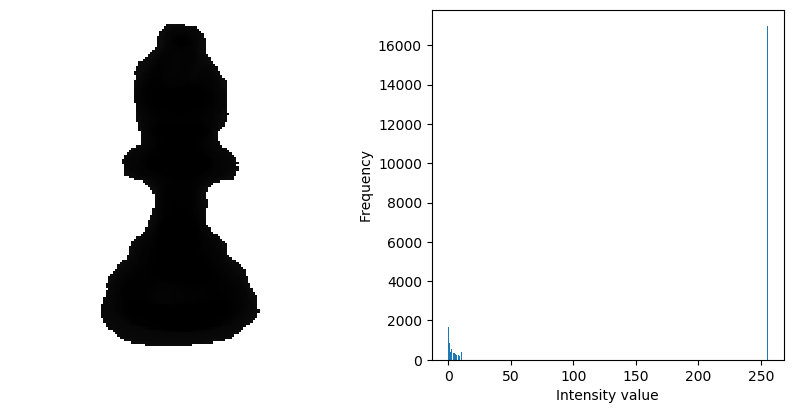

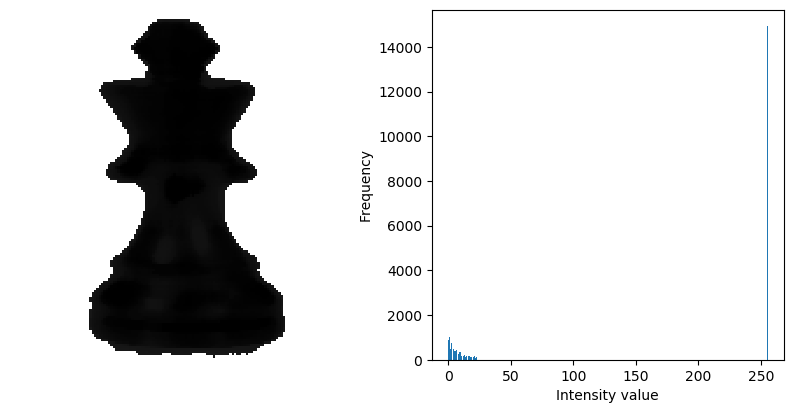

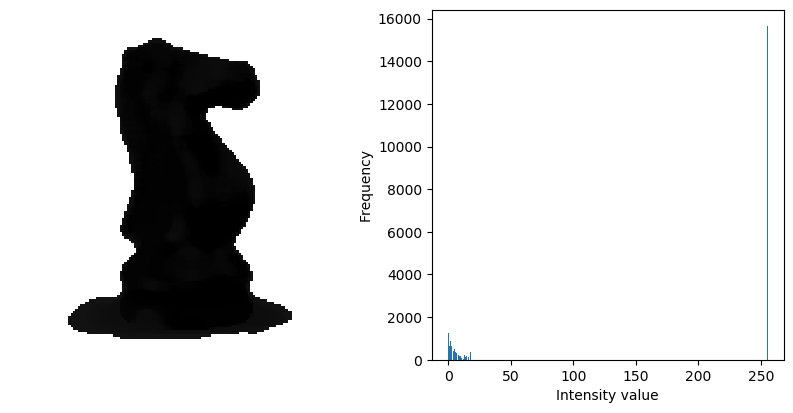

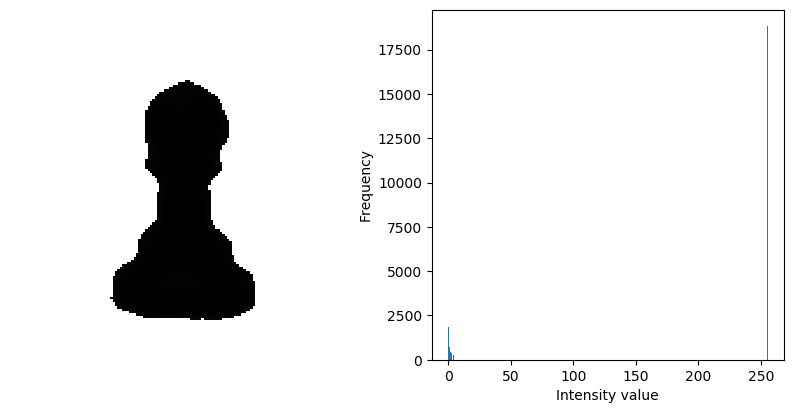

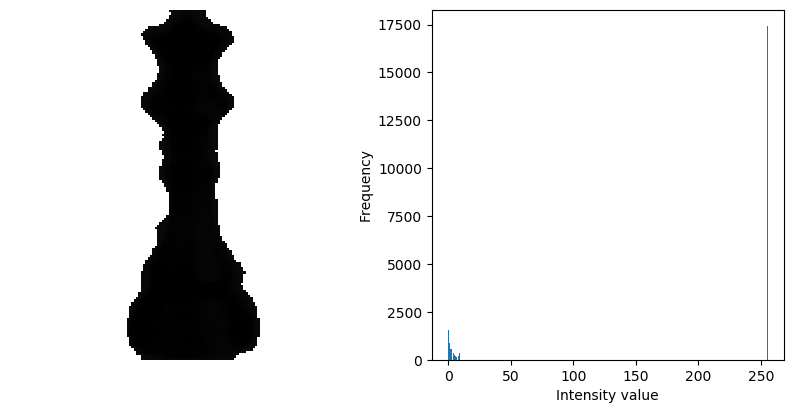

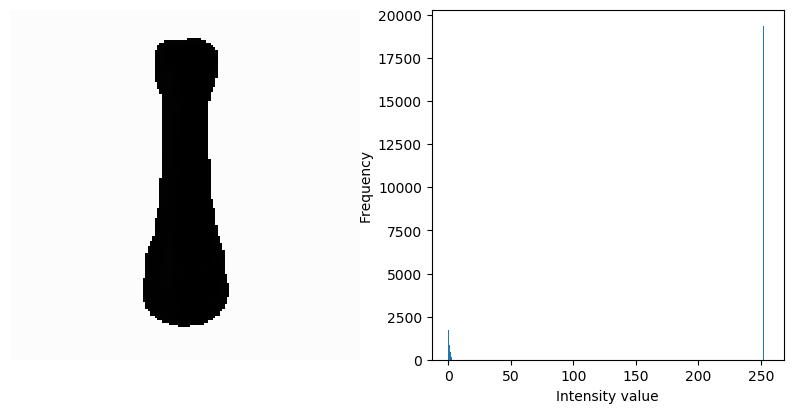

In [12]:
#melakukan import glob untuk membaca dataset
import glob

#kelas (path) pada folder dataset
class_chess = ['Bishop','King','Knight','Pawn','Queen','Rook']
for path in class_chess:
    #perulangan untuk setiap file citra, pada metode ini akan digunakan 1 buah citra dari dataset
    for filename in glob.glob('Chess/'+path+'/00000017.jpg'):
   
        #membuat variabel data yang akan menyimpan hasil pembacaan citra oleh Kelas Data 
        #yang mana kelas Data tersebut akan membuka file citra tersebut
        data = Data(filename)

        #me-resize citra 
        data.citra = resize(data.citra,150)
        
        #mengkonversi citra menjadi citra grayscale dengan memanggil fungsi rgb2gray
        data.citra= rgb2gray(data.citra)
        
        #melakukan ekualisasi dan transformasi terhadap citra dengan memanggil fungsi histogram_equalization
        data.citra, img1_transf = histogram_equalization(data.citra, 256)

        #Median filtering pada window 7x7
        data.citra = medianFilter(data.citra,3)    
        
        
        #Operasi titik color processing dengan koreksi gamma dengan faktor koreksi 2.2
        data.citra= koreksi_gamma(data.citra, 2.2)

        
        # menghitung histogram citra dengan 256 derajat keabuan
        hist_img = histogram(data.citra, 256)

        # menampilkan citra dan histogram yang telah dibentuk
        # vmin dan vmax digunakan sebagai parameter untuk menampilkan citra
        # citra yang akan ditampilkan akan memperlihatkan frekuensi intensitas piksel untuk semua derajat keabuan yaitu 256
        plt.figure(figsize=(10,10)) 
        plt.subplot(221)
        plt.imshow(data.citra, cmap="gray", vmin=0, vmax=255)
        plt.axis('off')

        plt.subplot(222)
        plt.bar(range(256), hist_img)
        plt.xlabel('Intensity value')
        plt.ylabel('Frequency')
        plt.show()
        

# Metode Ekstraksi Ciri (GLCM)

Tahapan ini bertujuan untuk memperoleh informasi yang terkandung dalam suatu citra untuk kemudian dijadikan sebagai acuan untuk membedakan antara citra yang satu dengan citra yang lain dan juga dengan tujuan untuk mendapatkan informasi mengenai nilai-nilai tekstur hasil ekstraksi ciri.

Gray level co-occurrence matrix (GLCM) merupakan matrik yang menggambarkan frekuensi munculnya pasangan piksel pada jarak d dan orientasi arah dengan sudut 𝜃 dalam citra yang digunakan untuk menghitung fitur-fitur glcm.

* Matriks co-occurrence adalah salah satu metode statistik yang dapat digunakan untuk analisis tekstur.

* Matriks co-occurrence dibentuk dari suatu citra dengan melihat pada piksel – piksel yang berpasangan yang memiliki intensitas tertentu. Penggunaan metode ini berdasar pada hipotesis bahwa dalam suatu tekstur akan terjadi perulangan konfigurasi atau pasangan aras keabuan. 

* Misal, d didefinisikan sebagai jarak antara dua posisi piksel, yaitu (𝑥1, 𝑦1) , (𝑥2, 𝑦2 ) dan 𝜃 didefinisikan sebagai sudut diantara keduanya. Maka matriks co-occurrence didefinisikan sebagai matriks yang menyatakan distribusi spasial antara dua piksel yang bertetangga yang memiliki intensitas i dan j, yang memiliki jarak d di antara keduanya, dan sudut 𝜃 diantara keduanya. 

* Matriks co-occurrence dinyatakan dengan 𝑃𝑖𝑗 . Suatu piksel yang bertetangga yang memiliki jarak d di antara keduanya, dapat terletak di delapan arah yang berlainan

In [13]:
#fungsi logaritma agar proses pembentukan matriks GLCM dapat sesuai dan tidak mengalami eror
def log_nr(M):
    M2 = M.copy()
    M2[M==0]=0.5
    return np.log(M2) 

In [14]:
#melakukan import glob untuk membaca dataset
import glob
from skimage.feature import greycomatrix,greycoprops
x = 0

distances = [2] #distances pada piksel yang ingin diperiksa
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4] #angles dalam radians yang ingin diperiksa
#kelas (path) pada folder dataset
class_chess = ['Bishop','King','Knight','Pawn','Queen','Rook']
for path in class_chess:
    #perulangan untuk setiap file citra, pada metode ini akan digunakan 1 buah citra dari dataset
    for filename in glob.glob('Chess/'+path+'/*'):
   
        fitur=[]
        #membuat variabel data yang akan menyimpan hasil pembacaan citra oleh Kelas Data 
        #yang mana kelas Data tersebut akan membuka file citra tersebut
        data = Data(filename)

        #me-resize citra 
        data.citra = resize(data.citra,150)
        
        #mengkonversi citra menjadi citra grayscale dengan memanggil fungsi rgb2gray
        data.citra= rgb2gray(data.citra)
        
        #melakukan ekualisasi dan transformasi terhadap citra dengan memanggil fungsi histogram_equalization
        data.citra, img1_transf = histogram_equalization(data.citra, 256)

        #Median filtering pada window 7x7
        data.citra = medianFilter(data.citra,3)    
        
        
        #Operasi titik color processing dengan koreksi gamma dengan faktor koreksi 2.2
        data.citra= koreksi_gamma(data.citra, 2.2)
        
        #membuat matriks glcm
        glcm = log_nr(greycomatrix(data.citra.astype('uint8'), distances, angles).astype('float'))
        #fitur-fitur glcm
        contrast = greycoprops(glcm, 'contrast')
        dissimilarity = greycoprops(glcm,'dissimilarity')
        homogeneity = greycoprops(glcm, 'homogeneity')
        asm = greycoprops(glcm,'ASM')
        energy = greycoprops(glcm,'energy')
        correlation = greycoprops(glcm,'correlation')

        if(x<1):
            #untuk header tabel pada file csv
            fitur.append('contrast 0')
            fitur.append('contrast 45')
            fitur.append('contrast 90')
            fitur.append('contrast 135')

            fitur.append('dissimilarity 0')
            fitur.append('dissimilarity 45')
            fitur.append('dissimilarity 90')
            fitur.append('dissimilarity 135')
             
            fitur.append('homogeneity 0')
            fitur.append('homogeneity 45')
            fitur.append('homogeneity 90')
            fitur.append('homogeneity 135')


            fitur.append('asm 0')
            fitur.append('asm 45')
            fitur.append('asm 90')
            fitur.append('asm 135')
            
            fitur.append('energy 0')
            fitur.append('energy 45')
            fitur.append('energy 90')
            fitur.append('energy 135')

            fitur.append('corelation 0')
            fitur.append('corelation 45')
            fitur.append('corelation 90')
            fitur.append('corelation 135')
            
            fitur.append('label')
            
            data.insertoCsv(fitur)
        else:
            #untuk data-data hasil ekstraksi ciri pada file csv
            fitur.append(contrast[0][0]) # sudut 0
            fitur.append(contrast[0][1]) # sudut 45
            fitur.append(contrast[0][2]) # sudut 90
            fitur.append(contrast[0][3]) # sudut 135

            fitur.append(dissimilarity[0][0])
            fitur.append(dissimilarity[0][1])
            fitur.append(dissimilarity[0][2])
            fitur.append(dissimilarity[0][3])

            fitur.append(homogeneity[0][0])
            fitur.append(homogeneity[0][1])
            fitur.append(homogeneity[0][2])
            fitur.append(homogeneity[0][3])


            fitur.append(asm[0][0])
            fitur.append(asm[0][1])
            fitur.append(asm[0][2])
            fitur.append(asm[0][3])

            fitur.append(energy[0][0])
            fitur.append(energy[0][1])
            fitur.append(energy[0][2])
            fitur.append(energy[0][3])

            fitur.append(correlation[0][0])
            fitur.append(correlation[0][1])
            fitur.append(correlation[0][2])
            fitur.append(correlation[0][3])
            
            fitur.append(path)
            data.insertoCsv(fitur)
        #berfungsi untuk mencetak jumlah citra dataset yang diekstraksi ciri
        x=x+1  
        print(x)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182


In [15]:
#membaca file csv menggunakan pandas, yaitu pd.read_csv()
df = pd.read_csv('chess_fitur.csv')


In [16]:
#mencetak kelas
T = df["label"][:-6]
kelas = T.unique()
print(kelas)

['Bishop' 'King' 'Knight' 'Pawn' 'Queen' 'Rook']


In [17]:
#menjadikan hasil kestraksi ciri dalam bentk file csv menjadi pandas dataframe agar tampilanya lebih terstruktur
data_fitur = pd.DataFrame(df)
data_fitur

,contrast 0,contrast 45,contrast 90,contrast 135,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,homogeneity 0,homogeneity 45,...,asm 135,energy 0,energy 45,energy 90,energy 135,corelation 0,corelation 45,corelation 90,corelation 135,label
0,10905.463593,10907.661045,10912.073386,10907.522396,85.409683,85.420741,85.437477,85.421583,0.010727,0.010706,...,0.000016,0.003957,0.003958,0.003959,0.003958,-0.004975,-0.005240,-0.005598,-0.005288,Bishop
1,11299.220349,11270.366766,11333.698914,11286.978900,87.934750,87.816904,88.236778,87.922643,0.008937,0.006540,...,0.000017,0.004171,0.004154,0.004178,0.004162,-0.033580,-0.030889,-0.036138,-0.031617,Bishop
2,11442.046138,11416.512163,11446.955647,11413.728914,88.871200,88.745089,88.865588,88.743116,0.005615,0.005403,...,0.000018,0.004213,0.004207,0.004224,0.004207,-0.030882,-0.029600,-0.031147,-0.029735,Bishop
3,10956.904033,10966.183615,10962.049659,10960.831290,85.807727,85.802955,85.807591,85.779486,0.009251,0.009171,...,0.000016,0.004015,0.004002,0.004006,0.004000,-0.018587,-0.017436,-0.018137,-0.016832,Bishop
4,10943.468808,10942.428565,10925.476766,10942.612815,85.888541,85.859500,85.795595,85.854014,0.009373,0.009382,...,0.000016,0.004027,0.004019,0.004024,0.004017,-0.023565,-0.022030,-0.020878,-0.021755,Bishop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,12870.235272,12963.095133,13219.722919,12977.758024,98.964718,99.444621,100.431451,99.541593,-0.009061,-0.010959,...,0.000025,0.005010,0.005005,0.005071,0.005008,-0.196578,-0.201073,-0.241331,-0.203624,Rook
177,10899.258980,10913.288335,10899.686055,10909.051377,85.541909,85.594720,85.545603,85.578304,0.010081,0.010027,...,0.000016,0.003993,0.003991,0.003993,0.003991,-0.011639,-0.012639,-0.011656,-0.012302,Rook
178,11255.799938,11275.413928,11316.161551,11280.629687,87.994085,88.087100,88.536448,88.109444,0.001750,0.001820,...,0.000018,0.004268,0.004271,0.004336,0.004270,-0.074669,-0.074350,-0.090253,-0.074780,Rook
179,11836.415199,11713.034766,11737.279253,11730.700900,91.455455,90.845204,90.921344,90.962922,0.004893,0.002922,...,0.000019,0.004413,0.004377,0.004374,0.004381,-0.047451,-0.041981,-0.046439,-0.042094,Rook


In [18]:
#menampilkan 5 hasil ekstraksi teratas
data_fitur.head()

,contrast 0,contrast 45,contrast 90,contrast 135,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,homogeneity 0,homogeneity 45,...,asm 135,energy 0,energy 45,energy 90,energy 135,corelation 0,corelation 45,corelation 90,corelation 135,label
0,10905.463593,10907.661045,10912.073386,10907.522396,85.409683,85.420741,85.437477,85.421583,0.010727,0.010706,...,0.000016,0.003957,0.003958,0.003959,0.003958,-0.004975,-0.005240,-0.005598,-0.005288,Bishop
1,11299.220349,11270.366766,11333.698914,11286.978900,87.934750,87.816904,88.236778,87.922643,0.008937,0.006540,...,0.000017,0.004171,0.004154,0.004178,0.004162,-0.033580,-0.030889,-0.036138,-0.031617,Bishop
2,11442.046138,11416.512163,11446.955647,11413.728914,88.871200,88.745089,88.865588,88.743116,0.005615,0.005403,...,0.000018,0.004213,0.004207,0.004224,0.004207,-0.030882,-0.029600,-0.031147,-0.029735,Bishop
3,10956.904033,10966.183615,10962.049659,10960.831290,85.807727,85.802955,85.807591,85.779486,0.009251,0.009171,...,0.000016,0.004015,0.004002,0.004006,0.004000,-0.018587,-0.017436,-0.018137,-0.016832,Bishop
4,10943.468808,10942.428565,10925.476766,10942.612815,85.888541,85.859500,85.795595,85.854014,0.009373,0.009382,...,0.000016,0.004027,0.004019,0.004024,0.004017,-0.023565,-0.022030,-0.020878,-0.021755,Bishop


In [19]:
#menampilkan info hasil ekstraksi ciri
data_fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 25 columns):
contrast 0           181 non-null float64
contrast 45          181 non-null float64
contrast 90          181 non-null float64
contrast 135         181 non-null float64
dissimilarity 0      181 non-null float64
dissimilarity 45     181 non-null float64
dissimilarity 90     181 non-null float64
dissimilarity 135    181 non-null float64
homogeneity 0        181 non-null float64
homogeneity 45       181 non-null float64
homogeneity 90       181 non-null float64
homogeneity 135      181 non-null float64
asm 0                181 non-null float64
asm 45               181 non-null float64
asm 90               181 non-null float64
asm 135              181 non-null float64
energy 0             181 non-null float64
energy 45            181 non-null float64
energy 90            181 non-null float64
energy 135           181 non-null float64
corelation 0         181 non-null float64
corelation 45

In [20]:
#menampilkan 5 hasil ekstraksi teratas dengan men-drop label pada tabel file csv
x = data_fitur.drop(['label'],axis=1)
x.head()

,contrast 0,contrast 45,contrast 90,contrast 135,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,homogeneity 0,homogeneity 45,...,asm 90,asm 135,energy 0,energy 45,energy 90,energy 135,corelation 0,corelation 45,corelation 90,corelation 135
0,10905.463593,10907.661045,10912.073386,10907.522396,85.409683,85.420741,85.437477,85.421583,0.010727,0.010706,...,0.000016,0.000016,0.003957,0.003958,0.003959,0.003958,-0.004975,-0.005240,-0.005598,-0.005288
1,11299.220349,11270.366766,11333.698914,11286.978900,87.934750,87.816904,88.236778,87.922643,0.008937,0.006540,...,0.000017,0.000017,0.004171,0.004154,0.004178,0.004162,-0.033580,-0.030889,-0.036138,-0.031617
2,11442.046138,11416.512163,11446.955647,11413.728914,88.871200,88.745089,88.865588,88.743116,0.005615,0.005403,...,0.000018,0.000018,0.004213,0.004207,0.004224,0.004207,-0.030882,-0.029600,-0.031147,-0.029735
3,10956.904033,10966.183615,10962.049659,10960.831290,85.807727,85.802955,85.807591,85.779486,0.009251,0.009171,...,0.000016,0.000016,0.004015,0.004002,0.004006,0.004000,-0.018587,-0.017436,-0.018137,-0.016832
4,10943.468808,10942.428565,10925.476766,10942.612815,85.888541,85.859500,85.795595,85.854014,0.009373,0.009382,...,0.000016,0.000016,0.004027,0.004019,0.004024,0.004017,-0.023565,-0.022030,-0.020878,-0.021755


# Kesimpulan
1. Menerapkan berbagai metode untuk menghasilkan citra dengan kualitas yang lebih baik atau cukup baik untuk dilakukan ekstraksi ciri dapat diterapkan dengan menguji coba metode-metode tersebut agar diketahui mana metode yang cukup baik untuk dapat menghasilkan kualitas citra yang bagus agar nantinya ekstraksi ciri dapat dilakukan.

2. Menerapkan metode ekstraksi ciri GLCM untuk mendapatkan ciri dari setiap citra dapat dilakukan dengan terlebih dahulu melakukan pre-processing untuk mendapatkan citra yang baik, setelah itu dilakukan pembuatan matriks GLCM dan terakhir dilakukan penentuan ekstraksi ciri menggunakan fitur-fitur ekstraksi cir GLCM yang ada.

### Referensi:

Bambang Yuwono, IMAGE SMOOTHING MENGGUNAKAN MEAN FILTERING, MEDIAN
FILTERING, MODUS FILTERING DAN GAUSSIAN FILTERING, TELEMATIKA Vol. 7, No. 1, JULI 2010

Danny Ibrahim, Achmad Hidayatno, R. Rizal Isnanto, PENGATURAN KECERAHAN DAN KONTRAS CITRA
SECARA AUTOMATIS
DENGAN TEKNIK PEMODELAN HISTOGRAM, Jurusan Teknik Elektro, Fakultas Teknik, Universitas Diponegoro.

Muhlis Fathurrahman, Ramaditia Dwiyansaputra, PENGENALAN CITRA HURUF HIJAIAH MENGGUNAKAN METODE
GRAY LEVEL CO-OCCURRENCE MATRICES (GLCM) DENGAN 4
SUDUT ORIENTASI DAN JARINGAN SYARAF TIRUAN
BACKPROPAGATION, JTIKA, Vol. 3, No. 1, Maret 2021

Nur Wakhidah, Perbaikan Kualitas Citra
Menggunakan Metode Contrast Stretching
( I mprovement of image quality using
a method Cont rast St retching), Fakultas Teknologi Informasi dan Komunikasi Universitas Semarang, JURNAL TRANSFORMATIKA, Volume 8, No.2, Januari 2011

T. Sukma Achriadi Sukiman, EKSTRAKSI FITUR GLCM (GRAY LEVEL CO-OCCURRENCE MATRIX)
DAN METODE LVQ (LEARNING VEKTOR QUANTIZATION) DALAM
PENGENALAN WAJAH BERBASIS CITRA DIGITAL,PROGRAM STUDI S2 TEKNIK INFORMATIKA
FAKULTAS ILMU KOMPUTER DAN TEKNOLOGI INFORMASI
UNIVERSITAS SUMATERA UTARA
MEDAN.
2020

Yelly N. Nabuasa, PENGOLAHAN CITRA DIGITAL
PERBANDINGAN METODE HISTOGRAM EQUALIZATION DAN
SPESIFICATION PADA CITRA ABU-ABU, J-ICON, Vol. 7 No. 1, Maret 2019, pp. 87~95

Yann Gavet, and Johan Debayle. 2019. Image Processing Tutorials with Python. Saint Etienne: Mines Saint-Etienne